# Executive Summary

This project concerns the use of Machine Learning Algorithms to predict the annual restaurant sales for restaurants within the TFI group (who own chains such as Burger King, Popeyes and Arby's).

As per my approach to other Kaggle projects, I will import the data, conduct some exploratory data analysis, and then apply a number of Machine Learning algorithms.

# 1. Import Data

First, import all the relevant packages and modules that will be used.

In [1]:
#Import relevant packages and modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

from sklearn import model_selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime
from itertools import product
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

Then, import and inspect the training data - which will be referred to as analysis data.

In [2]:
analysis_data = pd.read_csv('train.csv')
analysis_data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


The relevant features as shown to be as follows:
- ID: This is a unique identifier for each restaurant
- Open Date: The opening date of each restaurant
- City: The city in which each restaurant is located
- City Group: The type of city in which each restaurant is located; 'Big Cities' or 'Other
- Type: The type of restaurant
    - FC refers to Food Court
    - IL refers to Inline
    - DT refers to Drive Thru
    - MB refers to Mobile
- P1 through P37: This is obfuscated data. i.e. data for which full details are not disclosed (in order to protect the sensitive information of TFI)
- Revenue: The revenue of the restaurant in a given year. Values have been transformed such that they do not represent $ values.

Similarly, we import the submission data, which contains the equivalent features minis the target feature Revenue.

In [3]:
submission_data = pd.read_csv('test.csv')
submission_data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


# 2. Exploratory Data Analysis

## 2.1 Missing Values

Firstly, the data is checked for any missing values. How any missing data is dealt with will depend of factors such as its prevalence.

In [4]:
missing_data = analysis_data.isnull().sum()
missing_data

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

As shown above, there is no missing data.

## 2.2 Exploration of Original Features

The original features are now considered.

In [5]:
#Use describe method to give summary of metrics of numerical data
analysis_data.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


The histogram of revenue, and the histogram of the natural log of revenue reveal that the natural log of revenue is approximately normally distributed.

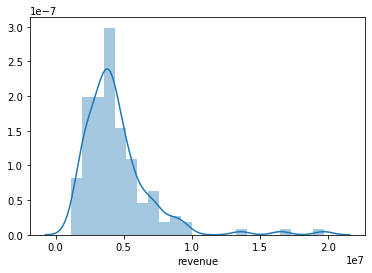

In [6]:
ax = sns.distplot(analysis_data['revenue'])

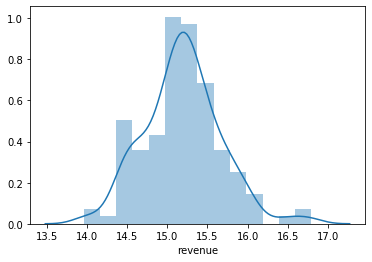

In [7]:
ax = sns.distplot(np.log(analysis_data['revenue']))

For each of the features, the Revenue vs the feature is plotted, and the value_counts attribute is used to observe the incidence of the potential outputs.

These plots will also be helpful to check for any potential outliers.

### 2.2.2 Open Date

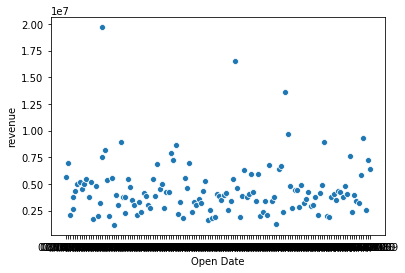

In [126]:
ax = sns.scatterplot(x="Open Date", y="revenue", data=analysis_data)

Due to there being so many different Open Dates, new features to capture how long the restaurant has been open will be created.

### 2.2.3 City

Around one third of all restaurants in the training data are in Istanbul, with several others in Ankara, and the rest spread between around 30 other cities.

In [9]:
analysis_data['City'].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Tekirdağ           3
Diyarbakır         3
Adana              3
Eskişehir          3
Kayseri            3
Muğla              2
Trabzon            2
Aydın              2
Konya              2
Kastamonu          1
Isparta            1
Denizli            1
Elazığ             1
Edirne             1
Tokat              1
Amasya             1
Bolu               1
Şanlıurfa          1
Kocaeli            1
Gaziantep          1
Kütahya            1
Kırklareli         1
Uşak               1
Afyonkarahisar     1
Balıkesir          1
Osmaniye           1
Karabük            1
Name: City, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

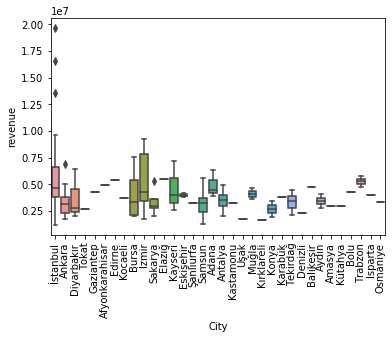

In [10]:
ax = sns.boxplot(x="City", y="revenue", data=analysis_data)
plt.xticks(rotation=90)

### 2.2.4 City Group

It appears that generally restaurants in Big Cities tend to have higher revenues than restaurants in Other cities.

In [11]:
analysis_data['City Group'].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

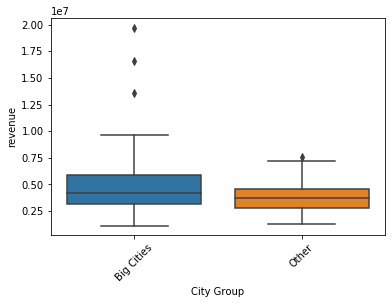

In [12]:
ax = sns.boxplot(x="City Group", y="revenue", data=analysis_data)
plt.xticks(rotation=45)
#ax.set_ylim()

### 2.2.5 Type

The majority (76) of the restaurants are Food Court, with a further 60 Inline restaurants, and one Drive Thru restaurant. Interestingly there are no Mobile restaurants in the analysis data.

In [13]:
analysis_data['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

A quick check of the submission data shows that there are 290 Mobile Restaurants.

In [14]:
submission_data['Type'].value_counts()

FC    57019
IL    40447
DT     2244
MB      290
Name: Type, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

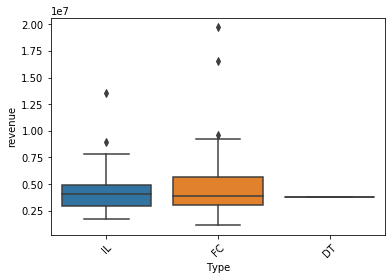

In [15]:
ax = sns.boxplot(x="Type", y="revenue", data=analysis_data)
plt.xticks(rotation=45)
#ax.set_ylim()

### 2.2.6 Obfuscated Data

There is no information on whether the obfuscated data is 'numerical', or represents 'categorical' data whereby each numerical label represents a category.

Plotting of the data suggests that it may be either the latter, or integer numerical variables. The plots also show that for many of the obfuscated features there appears to be no clear correlation between the data and the Revenue.

Therefore, as we do not know if there is any kind of order associated with the data in each feature, it is assumed the data is obfuscated categorical.

In [16]:
analysis_data['P1'].value_counts()

2     36
4     35
3     31
12    12
1      9
6      6
9      4
5      4
Name: P1, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

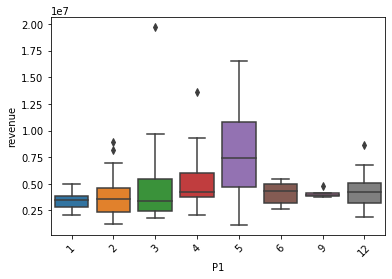

In [17]:
ax = sns.boxplot(x="P1", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [18]:
analysis_data['P2'].value_counts()

5.0    51
4.0    34
3.0    15
7.5    13
2.0    11
1.0     5
6.0     5
4.5     3
Name: P2, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

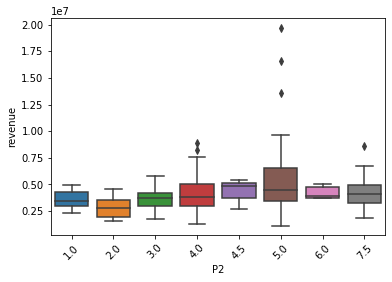

In [19]:
ax = sns.boxplot(x="P2", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [20]:
analysis_data['P3'].value_counts()

4.0    84
6.0    20
5.0    16
3.0    10
2.0     3
7.5     2
0.0     1
4.5     1
Name: P3, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

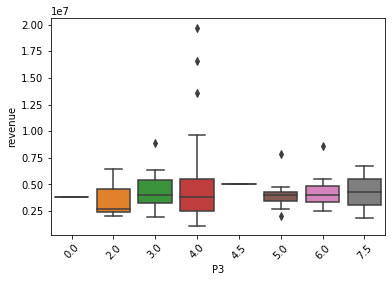

In [21]:
ax = sns.boxplot(x="P3", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [22]:
analysis_data['P4'].value_counts()

4.0    72
5.0    22
3.0    20
6.0    17
7.5     4
4.5     2
Name: P4, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

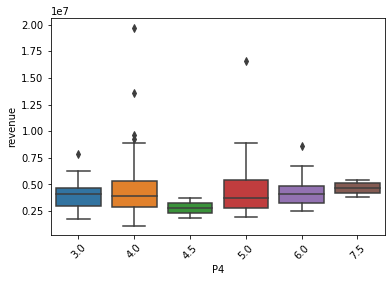

In [23]:
ax = sns.boxplot(x="P4", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [24]:
analysis_data['P5'].value_counts()

2    67
1    48
4    12
3     6
8     2
6     1
5     1
Name: P5, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

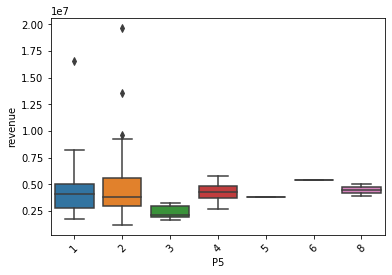

In [25]:
ax = sns.boxplot(x="P5", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [26]:
analysis_data['P6'].value_counts()

2     57
3     23
4     15
5     14
1     11
8      7
10     5
6      5
Name: P6, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

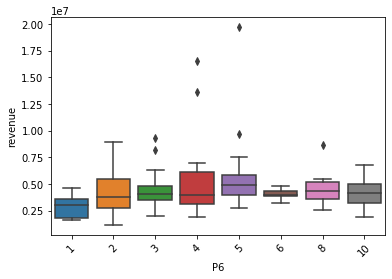

In [27]:
ax = sns.boxplot(x="P6", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [28]:
analysis_data['P7'].value_counts()

5     99
10    22
1     11
4      3
3      1
2      1
Name: P7, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

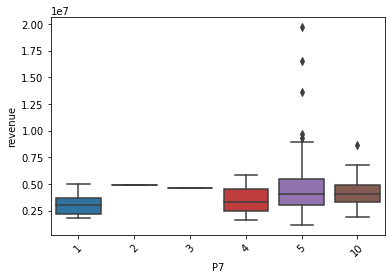

In [29]:
ax = sns.boxplot(x="P7", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [30]:
analysis_data['P8'].value_counts()

5     57
4     49
10    11
8     11
3      6
6      1
2      1
1      1
Name: P8, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

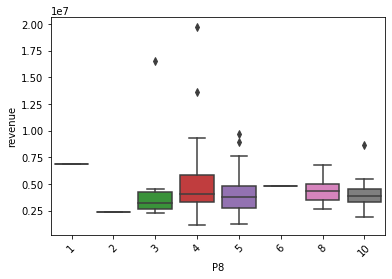

In [31]:
ax = sns.boxplot(x="P8", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [32]:
analysis_data['P9'].value_counts()

5     76
4     38
10    15
8      8
Name: P9, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

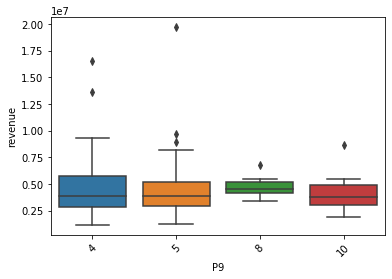

In [33]:
ax = sns.boxplot(x="P9", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [34]:
analysis_data['P10'].value_counts()

5     80
4     34
10    16
8      7
Name: P10, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

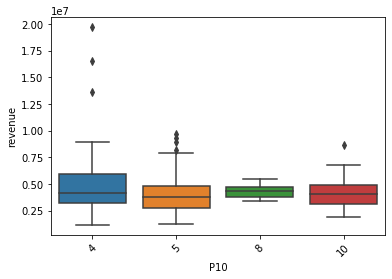

In [35]:
ax = sns.boxplot(x="P10", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [36]:
analysis_data['P11'].value_counts()

2     39
3     25
4     23
1     20
5     18
6      5
8      4
10     3
Name: P11, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

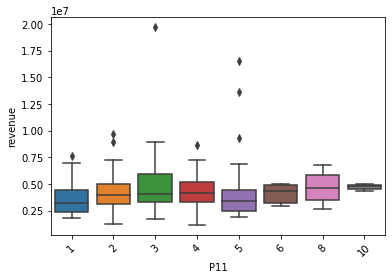

In [37]:
ax = sns.boxplot(x="P11", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [38]:
analysis_data['P12'].value_counts()

5     76
4     26
10    15
3      8
8      6
2      4
6      2
Name: P12, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

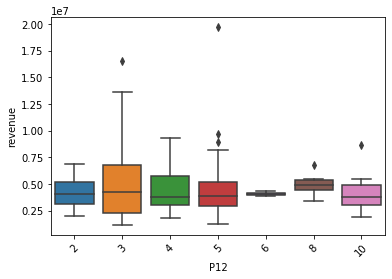

In [39]:
ax = sns.boxplot(x="P12", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [40]:
analysis_data['P13'].value_counts()

5.0    80
4.0    32
7.5    16
6.0     7
3.0     2
Name: P13, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

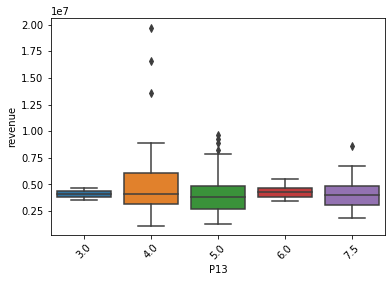

In [41]:
ax = sns.boxplot(x="P13", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [42]:
analysis_data['P14'].value_counts()

0     88
3     15
1      9
2      7
4      6
9      3
6      3
5      3
15     2
12     1
Name: P14, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

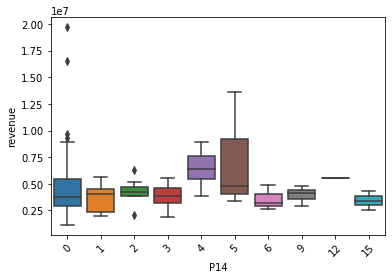

In [43]:
ax = sns.boxplot(x="P14", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [44]:
analysis_data['P15'].value_counts()

0     88
4     16
2     12
1      7
5      5
10     4
8      3
3      2
Name: P15, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

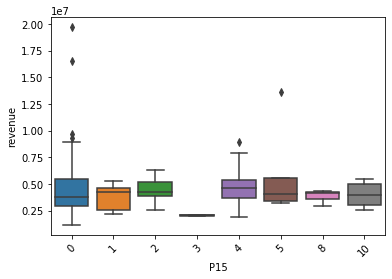

In [45]:
ax = sns.boxplot(x="P15", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [46]:
analysis_data['P16'].value_counts()

0     88
4     11
3      9
2      9
5      7
12     5
9      4
15     3
1      1
Name: P16, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

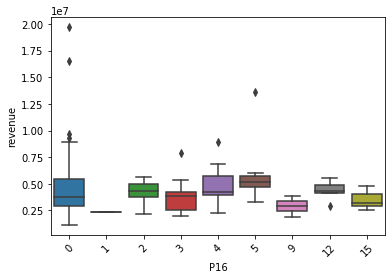

In [47]:
ax = sns.boxplot(x="P16", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [48]:
analysis_data['P17'].value_counts()

0     88
1     16
3     12
2     10
5      6
6      2
15     1
9      1
4      1
Name: P17, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

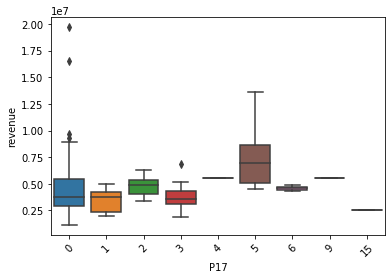

In [49]:
ax = sns.boxplot(x="P17", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [50]:
analysis_data['P18'].value_counts()

0     88
4     26
12     9
3      8
9      2
5      2
1      2
Name: P18, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

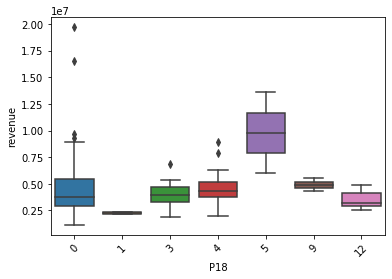

In [51]:
ax = sns.boxplot(x="P18", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [52]:
analysis_data['P19'].value_counts()

5     31
1     29
3     25
2     22
4     11
25     6
10     6
15     5
20     2
Name: P19, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

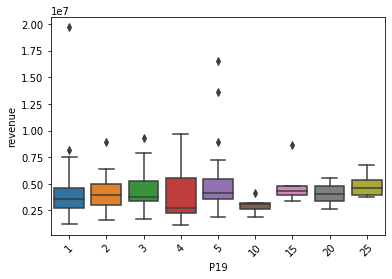

In [53]:
ax = sns.boxplot(x="P19", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [54]:
analysis_data['P20'].value_counts()

5     41
1     28
4     16
3     16
2     16
15     9
12     5
9      5
6      1
Name: P20, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

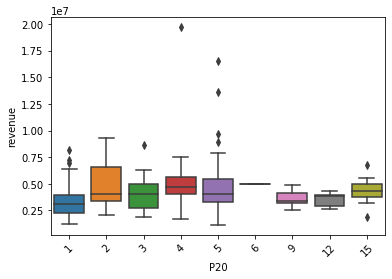

In [55]:
ax = sns.boxplot(x="P20", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [56]:
analysis_data['P21'].value_counts()

1     73
2     24
3     16
6      9
5      7
4      5
9      2
15     1
Name: P21, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

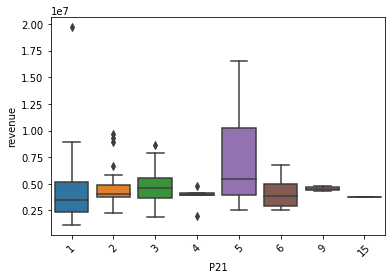

In [57]:
ax = sns.boxplot(x="P21", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [58]:
analysis_data['P22'].value_counts()

1    49
2    40
3    26
4    12
5    10
Name: P22, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

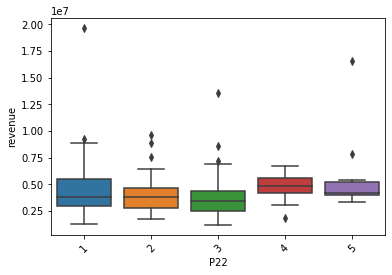

In [59]:
ax = sns.boxplot(x="P22", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [60]:
analysis_data['P23'].value_counts()

1     65
5     25
2     20
3     11
10     6
4      4
25     3
20     2
15     1
Name: P23, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

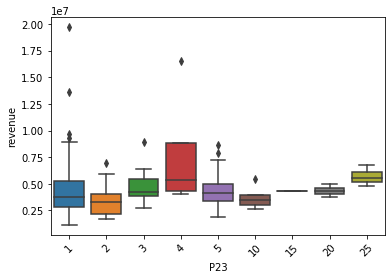

In [61]:
ax = sns.boxplot(x="P23", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [62]:
analysis_data['P24'].value_counts()

0     88
5     12
2      9
3      8
1      8
4      4
8      3
6      3
10     2
Name: P24, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

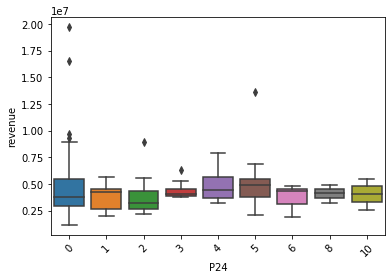

In [63]:
ax = sns.boxplot(x="P24", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [64]:
analysis_data['P25'].value_counts()

0     88
3     12
2     11
1      9
4      8
8      4
5      3
10     2
Name: P25, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

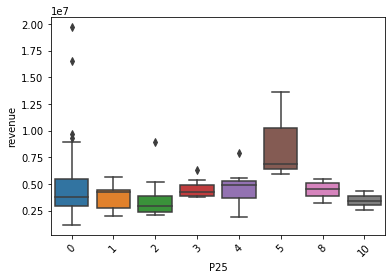

In [65]:
ax = sns.boxplot(x="P25", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [66]:
analysis_data['P26'].value_counts()

0.0     88
3.0     10
5.0      9
1.0      8
2.0      6
4.0      6
10.0     5
7.5      2
2.5      2
12.5     1
Name: P26, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

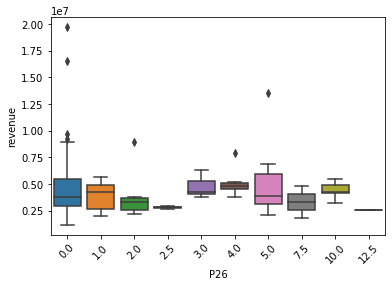

In [67]:
ax = sns.boxplot(x="P26", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [68]:
analysis_data['P27'].value_counts()

0.0     89
5.0     13
1.0     12
2.5      7
2.0      6
3.0      4
4.0      4
12.5     1
10.0     1
Name: P27, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

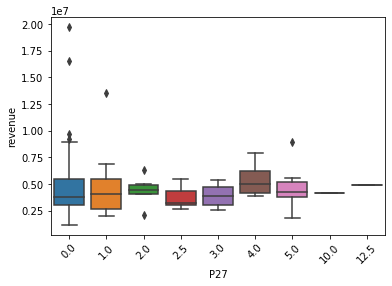

In [69]:
ax = sns.boxplot(x="P27", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [70]:
analysis_data['P28'].value_counts()

2.0     46
3.0     29
1.0     22
5.0     18
4.0      7
7.5      7
10.0     4
12.5     2
2.5      2
Name: P28, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

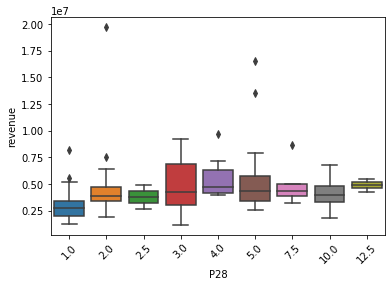

In [71]:
ax = sns.boxplot(x="P28", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [72]:
analysis_data['P29'].value_counts()

3.0    80
2.0    20
7.5    14
1.0    12
2.5     5
5.0     4
0.0     2
Name: P29, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

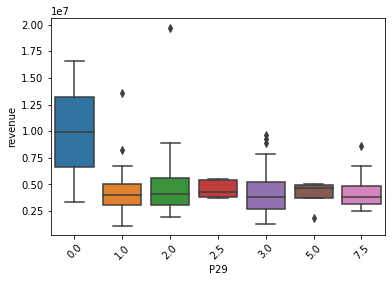

In [73]:
ax = sns.boxplot(x="P29", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [74]:
analysis_data['P30'].value_counts()

0     88
5     22
4     10
3      6
25     4
20     4
15     1
10     1
1      1
Name: P30, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

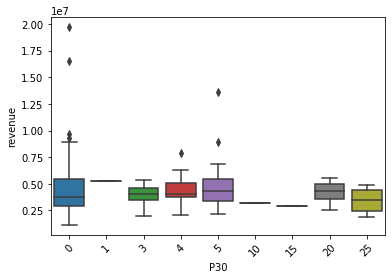

In [75]:
ax = sns.boxplot(x="P30", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [76]:
analysis_data['P31'].value_counts()

0     88
5     20
3      7
1      7
15     5
9      3
6      2
4      2
2      2
12     1
Name: P31, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

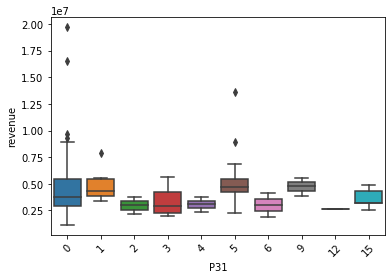

In [77]:
ax = sns.boxplot(x="P31", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [78]:
analysis_data['P32'].value_counts()

0     88
3     12
5     11
4      9
2      4
25     3
20     3
15     3
10     3
1      1
Name: P32, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

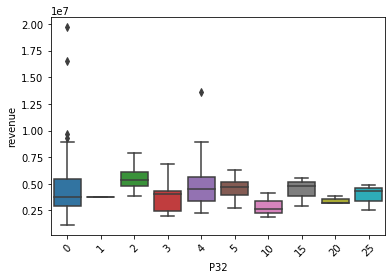

In [79]:
ax = sns.boxplot(x="P32", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [80]:
analysis_data['P33'].value_counts()

0    88
2    19
4    12
3    12
6     4
5     2
Name: P33, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

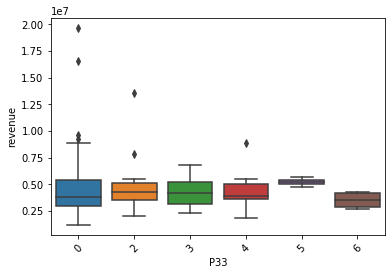

In [81]:
ax = sns.boxplot(x="P33", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [82]:
analysis_data['P34'].value_counts()

0     88
3     18
4     12
18     8
2      4
5      3
24     2
12     2
Name: P34, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

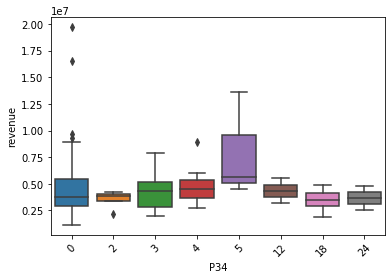

In [83]:
ax = sns.boxplot(x="P34", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [84]:
analysis_data['P35'].value_counts()

0     88
4     25
12     9
5      9
3      2
1      2
15     1
2      1
Name: P35, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

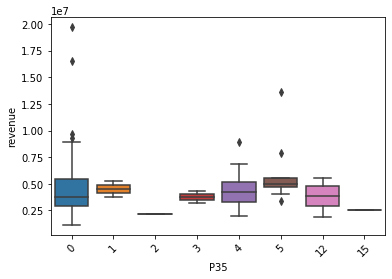

In [85]:
ax = sns.boxplot(x="P35", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [86]:
analysis_data['P36'].value_counts()

0     88
3     22
5      7
4      7
12     6
16     5
20     1
2      1
Name: P36, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

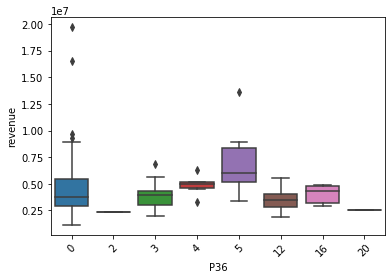

In [87]:
ax = sns.boxplot(x="P36", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

In [88]:
analysis_data['P37'].value_counts()

0    88
3    13
2    11
4     9
1     8
6     5
5     2
8     1
Name: P37, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

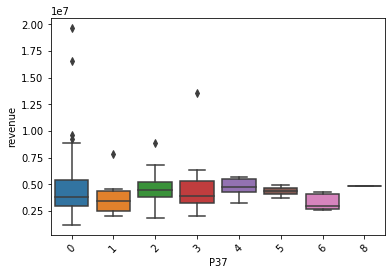

In [89]:
ax = sns.boxplot(x="P37", y="revenue", data=analysis_data)
plt.xticks(rotation=45)

## 2.3. Creation of New Features

As previously mentioned, features will be created to better explore the relationship between the date of opening of the restaurant and the revenue.

### 2.3.1 Extract Year of Opening

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

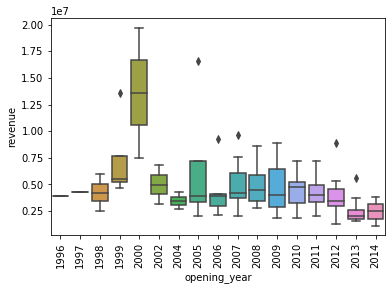

In [90]:
#Create a new feature of the pickup_year
analysis_data['Open Date Datetime'] = pd.to_datetime(analysis_data['Open Date'], format='%m/%d/%Y') 
submission_data['Open Date Datetime'] = pd.to_datetime(submission_data['Open Date'], format='%m/%d/%Y') 
analysis_data["opening_year"] = analysis_data["Open Date Datetime"].dt.year

#Plot the pickup_year to observe the affect on fare_amount
ax = sns.boxplot(x="opening_year", y="revenue", data=analysis_data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

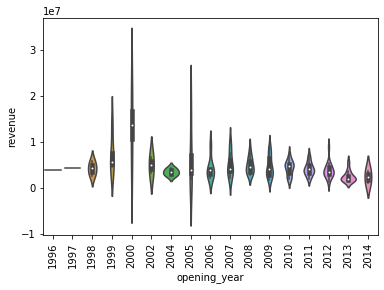

In [91]:
#Plot the pickup_year to observe the affect on fare_amount
ax = sns.violinplot(x="opening_year", y="revenue", data=analysis_data)
plt.xticks(rotation=90)

The general trend seems to be that restaurants opened in recent years have lower revenue.

### 2.3.2 Extract Month of Opening

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

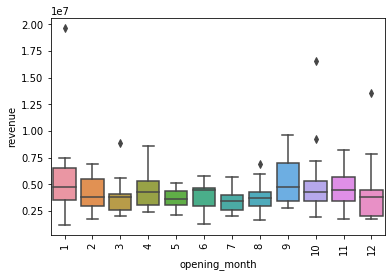

In [92]:
#Create a new feature of the pickup_month
analysis_data["opening_month"] = analysis_data["Open Date Datetime"].dt.month

#Plot the pickup_month to observe the affect on fare_amount
ax = sns.boxplot(x="opening_month", y="revenue", data=analysis_data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

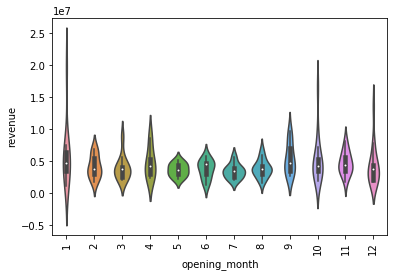

In [93]:
#Plot the pickup_month to observe the affect on fare_amount
ax = sns.violinplot(x="opening_month", y="revenue", data=analysis_data)
plt.xticks(rotation=90)

The month in which a restaurant opens seems to have little effect on the revenue.

### 2.3.3 Extract Day of Week of Opening

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

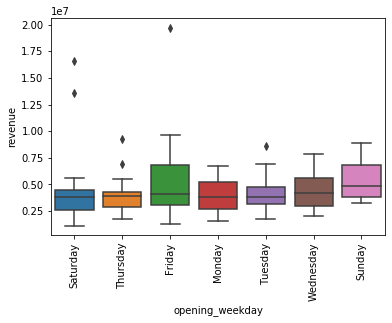

In [94]:
#Create a new feature of the pickup_weekday
analysis_data["opening_weekday"] = analysis_data["Open Date Datetime"].dt.day_name()

#Plot the pickup_weekday to observe the affect on fare_amount
ax = sns.boxplot(x="opening_weekday", y="revenue", data=analysis_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

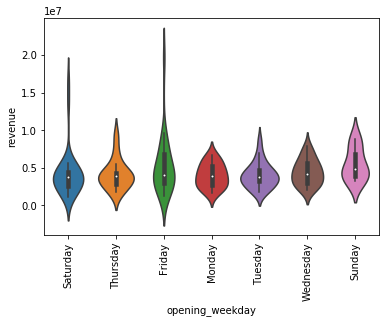

In [95]:
#Plot the pickup_weekday to observe the affect on fare_amount
ax = sns.violinplot(x="opening_weekday", y="revenue", data=analysis_data)
plt.xticks(rotation=90)

As expected, it appears that the day of the week on which the restaurant opens has little / no effect on it revenue.

### 2.3.1 Days since opening

It may be more prudent to create a feature which represents the number of days since the restaurant opened.

In [96]:
max_open_date = max(max(analysis_data['Open Date Datetime']), max(submission_data['Open Date Datetime']))

analysis_data['days_open'] = (max_open_date  - analysis_data['Open Date Datetime'])

analysis_data['days_open'] = analysis_data['days_open'].astype('timedelta64[D]').astype(int)

Plotting the days_open and looking at Pearson's coefficient suggests that there is something of a correlation between the revenue and the days since the restaurant opened.



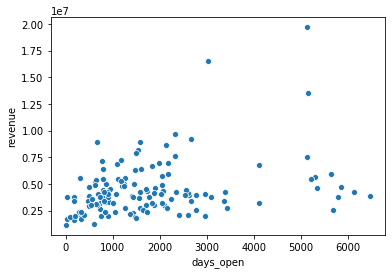

In [97]:
ax = sns.scatterplot(x="days_open", y="revenue", data=analysis_data)

In [98]:
analysis_data['revenue'].corr(analysis_data['days_open'])

0.32582148801087535

## 2.4. Standardisation and Scaling of Data

In preparation for the application of the Machine Learning Algorithms, the categorical features will be encoded, and the numerical features standardised

### 2.4.1 Encoding Categorical Features

The encoding will be done using One Hot Encoding: for each categorical features, each of the categorical variables will be reperesented as a sequence of binary featuers (i.e. each feature with multiple potential variables is represented by multiple features filled with either a 0 or 1, where 1 represents that the feature is the variable in question, and 0 represents it doesn't).
    
    
    

In [99]:
#drop Id, Open Date, revenue from the categorical features
categorical_features = [e for e in analysis_data.columns if e not in ('Id', 'Open Date', 'revenue', 'Open Date Datetime', 'days_open')]

#One Hot Encoding of the cateogorical features
categorical_features_encoded_analysis_data = pd.get_dummies(analysis_data[categorical_features].astype(str))
categorical_features_encoded_analysis_data.head()

,City_Adana,City_Afyonkarahisar,City_Amasya,City_Ankara,City_Antalya,City_Aydın,City_Balıkesir,City_Bolu,City_Bursa,City_Denizli,...,opening_month_7,opening_month_8,opening_month_9,opening_weekday_Friday,opening_weekday_Monday,opening_weekday_Saturday,opening_weekday_Sunday,opening_weekday_Thursday,opening_weekday_Tuesday,opening_weekday_Wednesday
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 2.4.2 Scaling / Standardisation of Numerical Features

In [100]:
#Extract which are the numerical features, by takibng the categorical features from the original dataframe
numerical_features = [e for e in analysis_data.drop(categorical_features, axis=1) if e not in ('Id', 'Open Date', 'Open Date Datetime')] 

#Define a dataframe containing the numerical features data
numerical_features_analysis_data = analysis_data[numerical_features]

#Produce an array of the standardised numerical data
scaled_numerical_features_analysis_data_array = ss.fit_transform(numerical_features_analysis_data)

#Convert the array of the standardised numerical data to a dataframe
scaled_numerical_features_analysis_data = pd.DataFrame(scaled_numerical_features_analysis_data_array, numerical_features_analysis_data.index, numerical_features_analysis_data.columns)

#Produce version without revenue
scaled_numerical_features_analysis_data_without_revenue = scaled_numerical_features_analysis_data.drop(['revenue'], axis=1)

## 2.5 Final Pre-Processing Steps

The data needs to be concatenated i.e. the categorical data and the numerical data needs to be put back together.

In [101]:
#Concatenate the categorical and numerical data
processed_analysis_data = np.concatenate([categorical_features_encoded_analysis_data.values, scaled_numerical_features_analysis_data_without_revenue.values], axis=1)

#Defining independent and target variables
processed_analysis_data_X = processed_analysis_data
processed_analysis_data_y = analysis_data['revenue']

#Splitting the data into train and test
from sklearn.model_selection import train_test_split
processed_analysis_data_X_train, processed_analysis_data_X_test, processed_analysis_data_y_train, processed_analysis_data_y_test = train_test_split(processed_analysis_data_X, processed_analysis_data_y, test_size = 0.3, random_state=42)

# 3. Application of Machine Learning Algorithms

The Random Forest regression model will be applied as:
- It is not as susceptible to potential outliers as some other algorithms
- The model automatically conducts feature selection (as features which are not useful are not used to split the data)
- Random Forest uses multiple trees hence is less likely to overfit than some alternative algorithms

## 3.1 Application of Default Random Forest Regressor

Initially, the default Random Forest regerssion model provided by scikitlearn is used.

In [102]:
#Instatntiate the RandomForestRegressor
default_rfr = ensemble.RandomForestRegressor()

#Fit the regressor to the training set
default_rfr.fit(processed_analysis_data_X_train, processed_analysis_data_y_train)

#Predict the labels of the 
pred_default_rfr = default_rfr.predict(processed_analysis_data_X_test)

#Convert both the predictions and the actual values to an array to be used in Python mean-squared error functiopn from scikitlearn
a1_default_rfr = np.asarray(pred_default_rfr)
a2_default_rfr = np.asarray(processed_analysis_data_y_test)

#Evaluate the Root Mean Square Error of the predictions against the actual values
rmse_default_rfr = sqrt(mean_squared_error(a2_default_rfr, a1_default_rfr))

print(rmse_default_rfr)

2833676.4074582485


## 3.2. Hyperparameter Tuning of RandomForest Regressor

In order to optimise the model, various hyperparameters will be tuned. Broadly speaking a "coarse-to-fine" approach is taken:
- RandomSearch for the parameters is conducted to find a potentially promising area for the parameters
- GridSearch is applied to this area to find the optimal set of parameters

### 3.2.1 RandomSearchCV

The parameters we have chosen to tune are:
 - n_estimators
 - max_depth
 - min_samples_split
 - min_samples_leaf
 - max_features
 - boostrap

In [103]:
#Create a list of values for the n_estimators
n_estimators_list = list(map(int, np.linspace(10, 1000, 20)))

#Create a list of values for the max_features
max_features_list = ['auto', 'sqrt', 'log2']

#Create a list of values for the max_depth (i.e. the maximum number of levels in a tree)
max_depth_list = list([int(x) for x in np.linspace(10, 200, num = 21)])

#Create a list of values for the min_samples_split (i.e. the minimum number of samples required to split a node)
min_samples_split_list = list(range(1,11))

#Create a list of values for the min_samples_leaf (i.e. the minimum number of samples required at each leaf node)
min_samples_leaf_list = list(range(1,11))

#Create a list of values for the boostrap (i.e. the method of selecting samples for each training tree)
bootstrap = ['True', 'False']

#Create the grid
parameter_grid = {
    'n_estimators' : n_estimators_list,
    'max_features' : max_features_list,
    'max_depth' : max_depth_list,
    'min_samples_split' : min_samples_split_list,
    'min_samples_leaf' : min_samples_leaf_list,
    'bootstrap' : bootstrap
}

#Define how many samples
number_models = 100

In [104]:
#Build the RandomizedSearchCV Object
random_rfr = RandomizedSearchCV(estimator = ensemble.RandomForestRegressor(), param_distributions = parameter_grid, n_iter = number_models, scoring = 'neg_mean_squared_error', cv=5, n_jobs = 4, refit=True, return_train_score=True)

#Fit the RandomisedSearchCV object to the data
random_rfr.fit(processed_analysis_data_X, processed_analysis_data_y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

To help analyse the results of the RandomSearch, a dataframe is constructed of the parameters found. From this dataframe, the parameters of the best model found by the RandomSearch are extracted.

In [105]:
results = pd.DataFrame(columns = ['mean_test_score'])
results['mean_test_score'] = random_rfr.cv_results_['mean_test_score']
results['mean_train_score'] = random_rfr.cv_results_['mean_train_score']
results['n_estimators'] = random_rfr.cv_results_['param_n_estimators']
results['max_features'] = random_rfr.cv_results_['param_max_features']
results['max_depth'] = random_rfr.cv_results_['param_max_depth']
results['min_samples_split'] = random_rfr.cv_results_['param_min_samples_split']
results['min_samples_leaf'] = random_rfr.cv_results_['param_min_samples_leaf']
results['bootstrap'] = random_rfr.cv_results_['param_bootstrap']

#Extract the metrics of the best model from the randomsearch
rand_search_optimum_parameters = results.sort_values(by='mean_test_score', ascending=False).head(1)
rand_search_optimum_parameters

,mean_test_score,mean_train_score,n_estimators,max_features,max_depth,min_samples_split,min_samples_leaf,bootstrap
31,-5.698619e+12,-2.751338e+12,478,sqrt,19,3,2,False


The RandomSearch observes the best performance for a model with the following parameters:
 - n_estimators: 895
 - max_features: sqrt
 - max_depth: 67
 - min_samples_split: 4
 - min_samples_leaf: 2
 - bootstrap: True

It would also be interesting to plot how well the models perform vs each parameter which is tuned. Note that as the RMSE is being used, a good score for mean_test_score is a low number.

As you would expect, the mean_train_score and mean_test_score are very highly correlated.

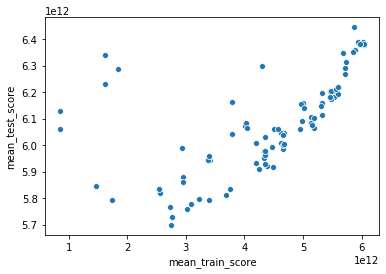

In [106]:
ax = sns.scatterplot(x=-results[results.columns[1]], y=-results[results.columns[0]])

There appears to be a general trend towards high values of n_estimators giving more accurate scores, but the trend is not as clear.

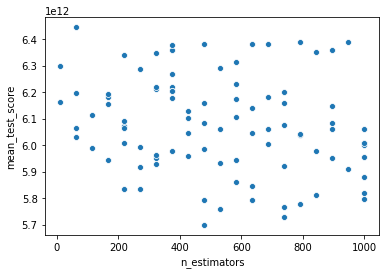

In [107]:
ax = sns.scatterplot(x=results[results.columns[2]], y=-results[results.columns[0]])

It is clear that max_features = 'sqrt' gives the best peforming models.

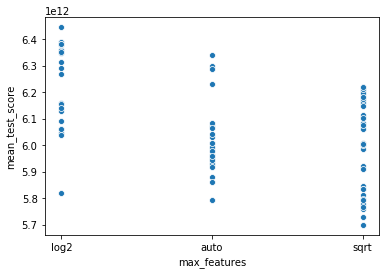

In [108]:
ax = sns.scatterplot(x=results[results.columns[3]], y=-results[results.columns[0]])

There is no real clear trend for accuracy vs max_depth.

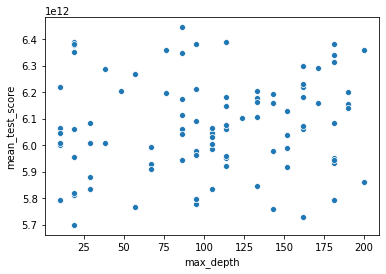

In [109]:
ax = sns.scatterplot(x=results[results.columns[4]], y=-results[results.columns[0]])

Again, there is no real clear trend of accuracy vs min_samples_split.

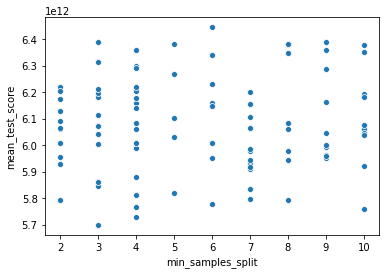

In [110]:
ax = sns.scatterplot(x=results[results.columns[5]], y=-results[results.columns[0]])

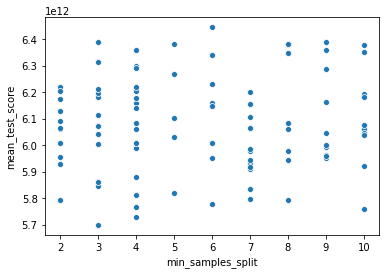

In [111]:
ax = sns.scatterplot(x=results[results.columns[5]], y=-results[results.columns[0]])

The plot shows that for lower values of min_samples leaf a higher accuracy is achieved. Interestingly, the accuracy when min_samples_leaf = 1 is worse than for 2. 

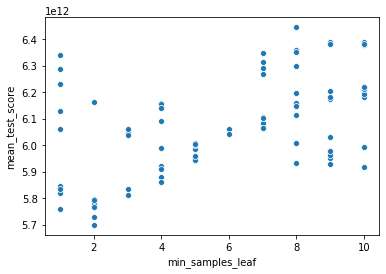

In [112]:
ax = sns.scatterplot(x=results[results.columns[6]], y=-results[results.columns[0]])

It is difficult to see from a scatter plot if there is any trend for bootstrap. Therefore a violin plot and a boxplot are also drawn. However, there is still no clear affect of the bootstrap parameter.

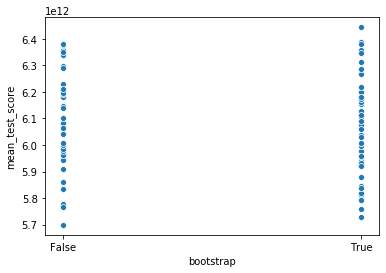

In [113]:
ax = sns.scatterplot(x=results[results.columns[7]], y=-results[results.columns[0]])

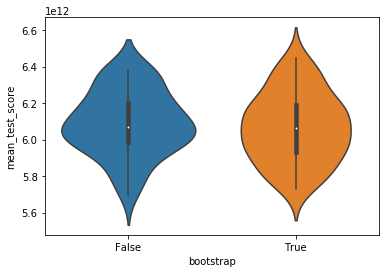

In [114]:
ax = sns.violinplot(x=results[results.columns[7]], y=-results[results.columns[0]])

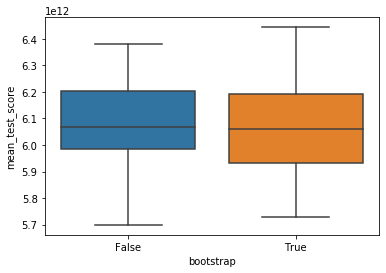

In [115]:
ax = sns.boxplot(x=results[results.columns[7]], y=-results[results.columns[0]])

The graphs do not appear to indicate that any of the parameters found in the optimum solution are clearly incorrect. Therefore these parameters will be used as base parameters for the GridSearch.

### 3.2.2 GridSearchCV

The RandomSearch was used to find an area of high accuracy for the various tuning parameters. The GridSearch will then be used to focus on this area to further tune the parameters.

In [116]:
#Extract the base values of each parameter for the GridSearch
grid_search_base_n_estimators = rand_search_optimum_parameters['n_estimators']
grid_search_base_max_features = rand_search_optimum_parameters['max_features']
grid_search_base_max_depth = rand_search_optimum_parameters['max_depth']
grid_search_base_min_samples_split = rand_search_optimum_parameters['min_samples_split']
grid_search_base_min_samples_leaf = rand_search_optimum_parameters['min_samples_leaf']
grid_search_base_bootstrap = rand_search_optimum_parameters['bootstrap']

#Create a list of values for the n_estimators for the GridSearch
grid_search_n_estimators_list = list(map(int, np.linspace(grid_search_base_n_estimators-5, grid_search_base_n_estimators+5, 11)))

#Create a list of values for the max_features for the GridSearch
grid_search_max_features_list = list(grid_search_base_max_features)

#Create a list of values for the max_depth (i.e. the maximum number of levels in a tree) for the GridSearch
grid_search_max_depth_list = list([int(x) for x in np.linspace(grid_search_base_max_depth-3, grid_search_base_max_depth+3, num = 7)])

#Create a list of values for the min_samples_split (i.e. the minimum number of samples required to split a node) for the GridSearch
grid_search_min_samples_split_list = list(map(int, np.linspace(grid_search_base_min_samples_split-1,grid_search_base_min_samples_split+1, 3)))


#Create a list of values for the min_samples_leaf (i.e. the minimum number of samples required at each leaf node) for the GridSearch
grid_search_min_samples_leaf_list = list(map(int, np.linspace(grid_search_base_min_samples_leaf-1,grid_search_base_min_samples_leaf+1, 3)))


#Create a list of values for the boostrap (i.e. the method of selecting samples for each training tree) for the GridSearch
grid_search_bootstrap = list(grid_search_base_bootstrap)


#Create the grid
grid_search_parameter_grid = {
    'n_estimators' : grid_search_n_estimators_list,
    'max_features' : grid_search_max_features_list,
    'max_depth' : grid_search_max_depth_list,
    'min_samples_split' : grid_search_min_samples_split_list,
    'min_samples_leaf' : grid_search_min_samples_leaf_list,
    'bootstrap' : grid_search_bootstrap
}

#Build the GridearchCV Object
grid_rfr = GridSearchCV(estimator = ensemble.RandomForestRegressor(), param_grid = grid_search_parameter_grid, scoring = 'neg_mean_squared_error', n_jobs = 4, cv=5, refit=True, return_train_score=True)

grid_rfr.fit(processed_analysis_data_X, processed_analysis_data_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=4,
     

To help analyse the results of the RandomSearch, a dataframe is constructed of the parameters found. From this dataframe, the parameters of the best model found by the RandomSearch are extracted.

In [117]:
grid_results = pd.DataFrame(columns = ['mean_test_score'])
grid_results['mean_test_score'] = grid_rfr.cv_results_['mean_test_score']
grid_results['mean_train_score'] = grid_rfr.cv_results_['mean_train_score']
grid_results['n_estimators'] = grid_rfr.cv_results_['param_n_estimators']
grid_results['max_features'] = grid_rfr.cv_results_['param_max_features']
grid_results['max_depth'] = grid_rfr.cv_results_['param_max_depth']
grid_results['min_samples_split'] = grid_rfr.cv_results_['param_min_samples_split']
grid_results['min_samples_leaf'] = grid_rfr.cv_results_['param_min_samples_leaf']
grid_results['bootstrap'] = grid_rfr.cv_results_['param_bootstrap']

#Extract the parameters of the best model from the GridSearch
grid_search_optimum_parameters = grid_results.sort_values(by='mean_test_score', ascending=False).head(1)
grid_search_optimum_parameters

,mean_test_score,mean_train_score,n_estimators,max_features,max_depth,min_samples_split,min_samples_leaf,bootstrap
351,-5.625521e+12,-2.731759e+12,483,sqrt,19,3,2,False


So the model we use is a Random Forest Regressor, with the following parameters:
 - n_estimators = 896
 - max_features = sqrt
 - max_depth = 70
 - min_samples_split = 4
 - min_samples_leaf = 2
 - bootstrap = True

In [118]:
#Create the model to be used for the submission data
tuned_rfr = ensemble.RandomForestRegressor(n_estimators=896, max_features='sqrt', max_depth=70, min_samples_split=4, min_samples_leaf=2, bootstrap='True')

## 3.2. Application to Submission Data

### 3.2.1 Transformation & Preprocessing of Submission Data

In order for the chosen MLA to be applied to the submission data, the data must undergo the same transformations as were applied to the analysis data.

The data is first inspected for any missing values; there is none.

In [119]:
submission_data.isnull().sum()

Id                    0
Open Date             0
City                  0
City Group            0
Type                  0
P1                    0
P2                    0
P3                    0
P4                    0
P5                    0
P6                    0
P7                    0
P8                    0
P9                    0
P10                   0
P11                   0
P12                   0
P13                   0
P14                   0
P15                   0
P16                   0
P17                   0
P18                   0
P19                   0
P20                   0
P21                   0
P22                   0
P23                   0
P24                   0
P25                   0
P26                   0
P27                   0
P28                   0
P29                   0
P30                   0
P31                   0
P32                   0
P33                   0
P34                   0
P35                   0
P36                   0
P37             

The equivalent transformations are then done to the submission data as was done for the analysis data.

In [120]:
submission_data['Open Date Datetime'] = pd.to_datetime(submission_data['Open Date'], format='%m/%d/%Y') 

#Create a new feature of the pickup_year
submission_data["opening_year"] = submission_data["Open Date Datetime"].dt.year

#Create a new feature of the pickup_month
submission_data["opening_month"] = submission_data["Open Date Datetime"].dt.month

#Create a new feature of the pickup_weekday
submission_data["opening_weekday"] = submission_data["Open Date Datetime"].dt.day_name()


#Days since opening
submission_data['days_open'] = (max_open_date - submission_data['Open Date Datetime'])

submission_data['days_open'] = submission_data['days_open'].astype('timedelta64[D]').astype(int)


#One Hot Encoding of the cateogorical features
categorical_features_encoded_submission_data = pd.get_dummies(submission_data[categorical_features].astype(str))

#Extract which are the numerical features, by taking the categorical features from the original dataframe - I'M NOT SURE THIS IS EXACTLY CORRECT AS THIS WILL INCLUDE CATEGORICAL FEATURES THAT WERE NOT IN THE ANALYSIS WOULDN'T IT?
names_of_numerical_features_submission_data = ['days_open']
numerical_features_submission_data = submission_data[names_of_numerical_features_submission_data]


#Produce an array of the standardised numerical data
scaled_numerical_features_submission_data_array = ss.fit_transform(numerical_features_submission_data)

#Convert the arary of the standardised numerical data to a dataframe
scaled_numerical_features_submission_data = pd.DataFrame(scaled_numerical_features_submission_data_array, numerical_features_submission_data.index, numerical_features_submission_data.columns)



#Select the same categorical features as were selected for the analysis data
selected_categorical_features_encoded_submission_data = categorical_features_encoded_submission_data[categorical_features_encoded_submission_data.columns.intersection(list(categorical_features_encoded_analysis_data.columns))]

#Find the list of columns which appear in the selected categorical features for analysis data but not in the encoded selected submission categorical features
categorical_features_to_add_to_submission_data = list(set(list(categorical_features_encoded_analysis_data.columns)-set(list(selected_categorical_features_encoded_submission_data.columns)))

#Add these missing features in, with values all set to 0
for feature in categorical_features_to_add_to_submission_data:
    selected_categorical_features_encoded_submission_data[feature] = 0
    
#Reoder the features to be as they were in the analysis data
selected_categorical_features_encoded_submission_data = selected_categorical_features_encoded_submission_data[categorical_features_encoded_analysis_data.columns]
    
#Make an array of the values as we did for the analysis data
selected_categorical_features_encoded_submission_data = selected_categorical_features_encoded_submission_data.values
    
#Select the same numerical features as were selected for the analysis data
selected_scaled_numerical_features_submission_data = scaled_numerical_features_submission_data[scaled_numerical_features_submission_data.columns.intersection(list(scaled_numerical_features_analysis_data_without_revenue.columns)]

#Make an array of the values as we did for the analysis data
selected_scaled_numerical_features_submission_data = selected_scaled_numerical_features_submission_data.values    
    
#Concantenate the categorical data and the numerical data
processed_submission_data = np.concatenate([selected_categorical_features_encoded_submission_data, selected_scaled_numerical_features_submission_data], axis=1)


#Defining independent variables
processed_submission_data_X = processed_submission_data 

/Users/danielscott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### 3.2.2 Application of Tuned Random Forest Regressor to the Submission Data

In [124]:
#Predict the labels of the processed submission data
tuned_rfr.fit(processed_analysis_data_X, processed_analysis_data_y)
pred_submission_tuned_rfr = tuned_rfr.predict(processed_submission_data_X)

#Transformation of the predictions into a dataframe
submission_predictions_tuned_rfr = pd.DataFrame(pred_submission_tuned_rfr,columns=['Prediction'])
submission_predictions_tuned_rfr['Id'] = submission_data['Id']
cols_tuned_rfr = ['Id', 'Prediction']
submission_predictions_tuned_rfr = submission_predictions_tuned_rfr[cols_tuned_rfr]

#Conversion of the predictions dataframe into a CSV file for submission
submission_predictions_tuned_rfr.to_csv('predictions_tuned_rfr_final.csv', index=False)

The CSV file containing my predictions was then uploaded to the Kaggle website, which informed me I had scored 1,723,185. This score places me in the top 8% of entries on the Kaggle leaderboard.

# 4. Conclusions and Next Steps

The key takeaway from this project is the importance of hyperparameter tuning (as evidenced by my greatly improved score vs previous Kaggle projects).

I will continue to explore this and look to use more advanced techniques of tuning and apply these to multiple algorithms.